In [25]:
from typing import Annotated,Literal
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from pydantic import BaseModel,Field
from typing_extensions import TypedDict

# Simple 1 Agent

In [26]:
class State(TypedDict):
    message: Annotated[list,add_messages]

graph_builder = StateGraph(State)

def chatbot(state: State) -> State:
    return {"message":[f"Hello User ! {state['message'][-1].content}"]}

graph_builder.add_node("chatbot1",chatbot)

graph_builder.add_edge(START,"chatbot1")
graph_builder.add_edge("chatbot1",END)

In [27]:
graph = graph_builder.compile()
user_input = "Focus"
state = graph.invoke({"message":[{"role":"user",
                    "content":user_input}]})
                    
print(state["message"][-1].content)

Hello User ! Focus


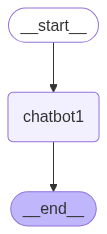

In [28]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

# Agents with router